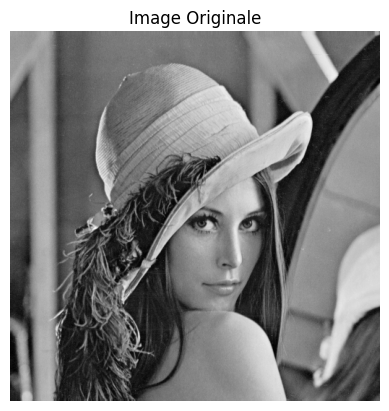

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread("lena_color.tiff", cv2.IMREAD_GRAYSCALE)  # Image en niveaux de gris
cv2.imwrite("original_image.jpg", image)

plt.imshow(image, cmap='gray')
plt.title("Image Originale")
plt.axis("off")
plt.show()

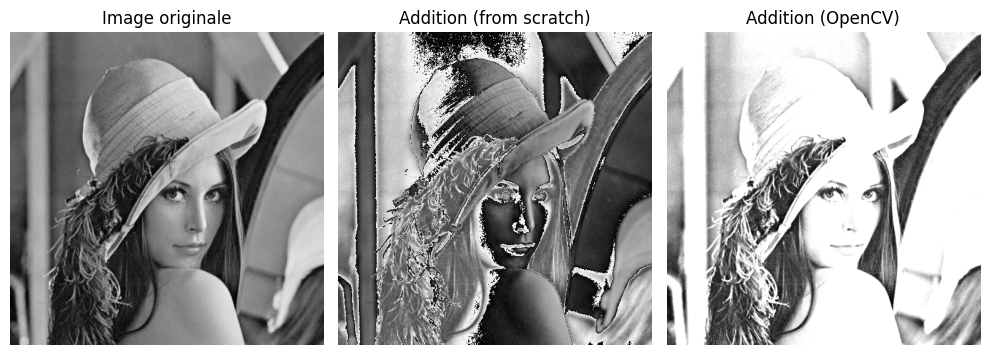

In [6]:
#addition des immages
def add_images(img1, img2):
    result = img1 + img2
    return np.clip(result, 0, 255).astype(np.uint8)
# Addition de l'image avec elle-même
added_image = add_images(image, image)

# Comparaison avec OpenCV
opencv_add = cv2.add(image, image)

# Afficher les résultats
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Image originale")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Addition (from scratch)")
plt.imshow(added_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Addition (OpenCV)")
plt.imshow(opencv_add, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

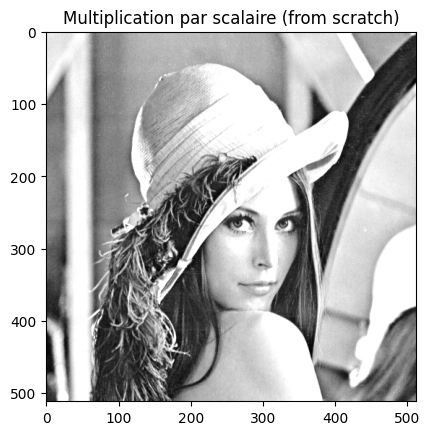

In [8]:
def multiply_by_scalar(img, scalar):
    return np.clip(img * scalar, 0, 255).astype(np.uint8)

scalar = 1.5
multiplied_image = multiply_by_scalar(image, scalar)
# Comparaison avec OpenCV
opencv_mult = cv2.multiply(image, scalar)

plt.title("Multiplication par scalaire (from scratch)")
plt.imshow(multiplied_image, cmap="gray")
plt.show()

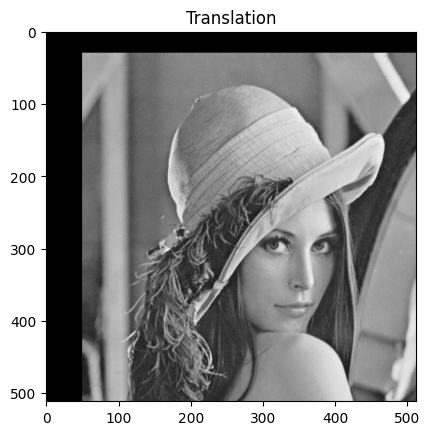

In [12]:
def translate_image(img, tx, ty):
    rows, cols = img.shape
    translated = np.zeros_like(img)
    for x in range(cols):
        for y in range(rows):
            new_x, new_y = x + tx, y + ty
            if 0 <= new_x < cols and 0 <= new_y < rows:
                translated[new_y, new_x] = img[y, x]
    return translated

translated_image = translate_image(image, 50, 30)
opencv_translation_matrix = np.float32([[1, 0, 50], [0, 1, 30]])
opencv_translated = cv2.warpAffine(image, opencv_translation_matrix, (image.shape[1], image.shape[0]))

plt.title("Translation")
plt.imshow(translated_image, cmap="gray")
plt.show()
